In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

%matplotlib inline

# task 1

In [2]:
df=pd.read_csv('/Users/mac/Downloads/test2&3_data/test2_data/Test_Data_C_2014_06_30.csv')

In [5]:
df.head()

,Unnamed: 0,ID,Dlq_stat,amounts,obs_date,Dlq_days,Vertical1,Province1
0,1,F1,Current,389.628333,2014-06-30 12:00:00,NaN,Home Improvement,ON
1,2,F2,Current,2446.128333,2014-06-30 12:00:00,NaN,Vehicle,AB
2,3,F3,Current,2874.366667,2014-06-30 12:00:00,NaN,Home Improvement,ON
3,4,F4,Current,299.626667,2014-06-30 12:00:00,NaN,Home Improvement,ON
4,5,F5,Current,745.455000,2014-06-30 12:00:00,NaN,Home Improvement,Other Provinces


In [11]:
df.groupby('Dlq_stat').sum()

,Unnamed: 0,amounts,Dlq_days
Dlq_stat,,,
Current,88079628,2.587966e+07,0.0
Delinquent,2090877,2.662950e+05,2741.0
WriteOff,172736,1.242230e+04,0.0


<AxesSubplot:title={'center':'Dlq_status: By accumlative amount'}, xlabel='Dlq_stat'>

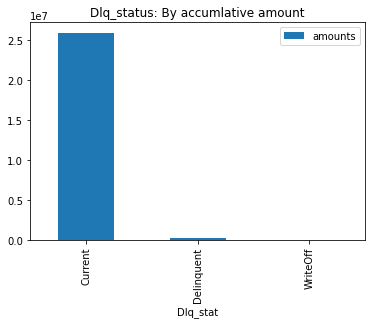

In [40]:
df.groupby('Dlq_stat').sum().plot(y='amounts',kind='bar', title ='Dlq_status: By accumlative amount')

<AxesSubplot:title={'center':'Dlq_status: By number of cases'}, xlabel='Dlq_stat'>

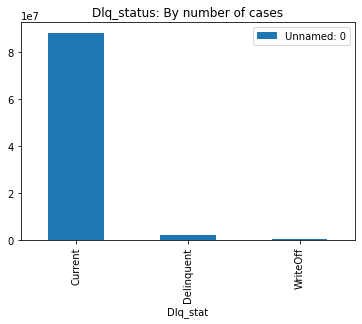

In [41]:
df.groupby('Dlq_stat').sum().plot(y='Unnamed: 0',kind='bar', title ='Dlq_status: By number of cases')

In [39]:
df.groupby('Vertical1').sum()

,Unnamed: 0,amounts,Dlq_days
Vertical1,,,
Home Improvement,51075550,9.958320e+06,337.0
Vehicle,39267691,1.620006e+07,2404.0


<AxesSubplot:title={'center':'loan channel:By number of cases'}, xlabel='Vertical1'>

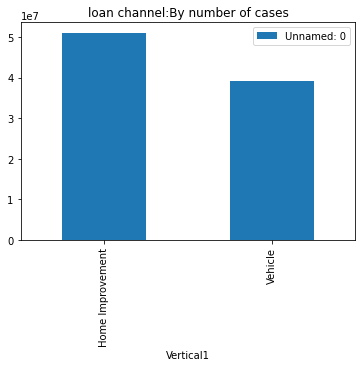

In [42]:
df.groupby('Vertical1').sum().plot(y='Unnamed: 0',kind='bar', title ='loan channel:By number of cases')

<AxesSubplot:title={'center':'loan channel:By accumlative amount'}, xlabel='Vertical1'>

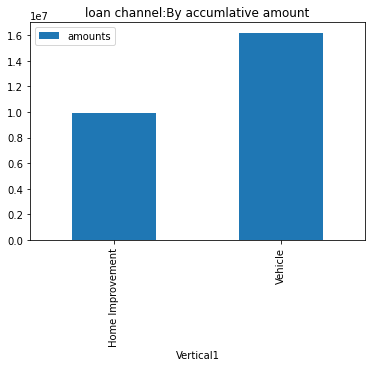

In [43]:
df.groupby('Vertical1').sum().plot(y='amounts',kind='bar', title ='loan channel:By accumlative amount')

In [48]:
df.groupby(['Dlq_stat','Vertical1']).sum()

Unnamed: 0       amounts  Dlq_days
Dlq_stat   Vertical1                                           
Current    Home Improvement    50892457  9.938896e+06       0.0
           Vehicle             37187171  1.594077e+07       0.0
Delinquent Home Improvement      183093  1.942397e+04     337.0
           Vehicle              1907784  2.468711e+05    2404.0
WriteOff   Vehicle               172736  1.242230e+04       0.0

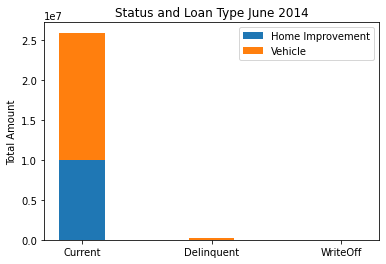

In [189]:
import matplotlib.pyplot as plt


labels = ['Current','Delinquent','WriteOff']
Home_Improvement = [9.938896e+06, 1.942397e+04, 0]
Vehicle = [1.594077e+07, 2.468711e+05, 1.242230e+04]
width = 0.35       

fig, ax = plt.subplots()

ax.bar(labels, Home_Improvement, width,  label='Home Improvement')
ax.bar(labels, Vehicle, width,  bottom=Home_Improvement,
       label='Vehicle')

ax.set_ylabel('Total Amount')
ax.set_title('Status and Loan Type June 2014')
ax.legend()

plt.show()

# task 2

In [22]:
df2=pd.read_csv('/Users/mac/Downloads/test2&3_data/test2_data/Test_Data_C_2014_07_30.csv')

In [23]:
df3=pd.read_csv('/Users/mac/Downloads/test2&3_data/test2_data/Test_Data_C_2014_08_30.csv')

In [24]:
df2.head()

,Unnamed: 0,ID,Dlq_stat,amounts,obs_date,Dlq_days,Vertical1,Province1
0,1,G1,Current,374.878333,2014-07-30 12:00:00,NaN,Home Improvement,ON
1,2,G2,Current,2850.123333,2014-07-30 12:00:00,NaN,Home Improvement,ON
2,3,G3,Current,288.401667,2014-07-30 12:00:00,NaN,Home Improvement,ON
3,4,G4,Current,718.526667,2014-07-30 12:00:00,NaN,Home Improvement,Other Provinces
4,5,G5,Current,274.466667,2014-07-30 12:00:00,NaN,Home Improvement,ON


In [25]:
df3.head()

,Unnamed: 0,ID,Dlq_stat,amounts,obs_date,Dlq_days,Vertical1,Province1
0,1,H1,Current,360.115000,2014-08-30 12:00:00,NaN,Home Improvement,ON
1,2,H2,Current,2410.971667,2014-08-30 12:00:00,NaN,Vehicle,AB
2,3,H3,Current,2825.750000,2014-08-30 12:00:00,NaN,Home Improvement,ON
3,4,H4,Current,277.110000,2014-08-30 12:00:00,NaN,Home Improvement,ON
4,5,H5,Current,691.580000,2014-08-30 12:00:00,NaN,Home Improvement,Other Provinces


In [26]:
frames = [df, df2, df3]

result = pd.concat(frames)

In [29]:
len(result)

40395

In [30]:
len(df)+len(df2)+len(df3)

40395

In [53]:
df2.groupby(['Dlq_stat','Vertical1']).sum()

Unnamed: 0       amounts  Dlq_days
Dlq_stat   Vertical1                                           
Current    Home Improvement    49378304  9.722938e+06       0.0
           Vehicle             36066824  1.559193e+07       0.0
Delinquent Home Improvement      277649  2.119774e+04     547.0
           Vehicle              1566609  2.102684e+05    2459.0
WriteOff   Home Improvement       13082  8.496850e+02       0.0
           Vehicle               223852  3.921547e+04       0.0

In [54]:
df3.groupby(['Dlq_stat','Vertical1']).sum()

Unnamed: 0       amounts  Dlq_days
Dlq_stat   Vertical1                                           
Current    Home Improvement    57981013  1.102242e+07       0.0
           Vehicle             35309957  1.528384e+07       0.0
Delinquent Home Improvement      350035  3.826313e+04     642.0
           Vehicle              2584037  3.505548e+05    3044.0
WriteOff   Home Improvement       99350  9.027430e+03       0.0
           Vehicle               226123  3.254800e+04       0.0

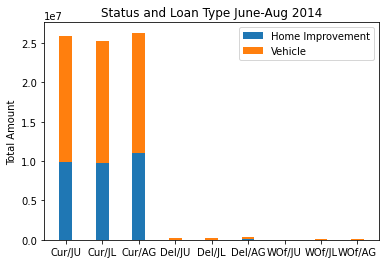

In [192]:

labels = ['Cur/JU','Cur/JL','Cur/AG','Del/JU','Del/JL','Del/AG','WOf/JU','WOf/JL', 'WOf/AG']
Home_Improvement = [9.938896e+06, 9.722938e+06, 1.102242e+07,1.942397e+04,2.119774e+04,3.826313e+04,0,8.496850e+02,9.027430e+03]
Vehicle = [1.594077e+07, 1.559193e+07, 1.528384e+07,2.468711e+05,2.102684e+05,3.505548e+05, 1.242230e+04,3.921547e+04,3.254800e+04]
width = 0.35       

fig, ax = plt.subplots()

ax.bar(labels, Home_Improvement, width,  label='Home Improvement')
ax.bar(labels, Vehicle, width,  bottom=Home_Improvement,
       label='Vehicle')

ax.set_ylabel('Total Amount')
ax.set_title('Status and Loan Type June-Aug 2014')
ax.legend()

plt.show()

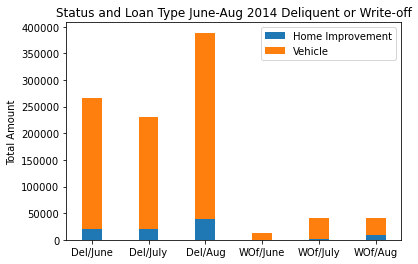

[CV] END ..max_depth=10, min_samples_split=5, n_estimators=5; total time=   0.0s
[CV] END .max_depth=10, min_samples_split=5, n_estimators=30; total time=   0.1s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, min_samples_split=25, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_split=50, n_estimators=200; total time=   0.5s
[CV] END max_depth=30, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=30, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=30, min_samples_split=25, n_estimators=200; total time=   0.6s
[CV] END max_depth=30, min_samples_split=25, n_estimators=200; total time=   0.5s
[CV] END ..max_depth=10, min_samples_split=5, n_estimators=5; total time=   0.0s
[CV] END .max_depth=10, 

In [193]:

labels = ['Del/June','Del/July','Del/Aug','WOf/June','WOf/July', 'WOf/Aug']
Home_Improvement = [1.942397e+04,2.119774e+04,3.826313e+04,0,8.496850e+02,9.027430e+03]
Vehicle = [2.468711e+05,2.102684e+05,3.505548e+05, 1.242230e+04,3.921547e+04,3.254800e+04]
width = 0.35       

fig, ax = plt.subplots()

ax.bar(labels, Home_Improvement, width,  label='Home Improvement')
ax.bar(labels, Vehicle, width,  bottom=Home_Improvement,
       label='Vehicle')

ax.set_ylabel('Total Amount')
ax.set_title('Status and Loan Type June-Aug 2014 Deliquent or Write-off')
ax.legend()

plt.show()

# Test 3 - Machine Learning

In [62]:
ds=pd.read_csv('/Users/mac/Downloads/test2&3_data/test3_data/test3_data.csv')

In [75]:
ds

,Unnamed: 0,ID,ActionTime,Action,Website,BannerSize,Brand,colour,InteractionTime
0,1,AMsySZbNg8SBwPtj7IGHnip_8aY0,1508761859495365,View,Facebook,300x600,Carter's,Pink,0.171601
1,2,AMsySZZcUFNGOJs-lfC9j-ZDlV7Z,1502847469736117,View,Facebook,300x250,Burberry,Red,4.303945
2,3,AMsySZYoK8_bD0hGv4zu0iRn1TFo,1514169431528120,View,Facebook,728x90,Disney,Yellow,0.868106
3,4,AMsySZahxpwLOWnMJj6RGATgwEOc,1515527952591896,View,Facebook,320x50,Carter's,Yellow,0.802647
4,5,AMsySZbqgfMBDtAqZz1jVRaOmX00,1507514809374045,View,instagram.com,300x250,Gap,Gold,0.627148
...,...,...,...,...,...,...,...,...,...
999995,999996,AMsySZY-9Mzh_xjk57_PBNO_8QRO,1508108130372165,View,instagram.com,300x250,Old Navy,Yellow,0.049011
999996,999997,AMsySZY-KoDAx1qJv15SZ9lKO2QF,1516760241253562,View,Twitter,320x480,JoeFresh,Yellow,0.059118
999997,999998,AMsySZZGRYHeXVjPP2Rr6F-kjFc3,1502841951670170,View,Other,300x250,JoeFresh,Pink,0.025754
999998,999999,AMsySZaSAhXiCSGhaCLWcoLse-0i,1517068511614322,View,Facebook,300x250,Old Navy,Pink,0.453710


In [65]:
ds.describe()

,Unnamed: 0,ActionTime,InteractionTime
count,1000000.000000,1.000000e+06,999992.000000
mean,500000.500000,1.508367e+15,0.998667
std,288675.278933,4.362784e+12,0.998170
min,1.000000,1.500991e+15,0.000002
25%,250000.750000,1.505164e+15,0.288696
50%,500000.500000,1.507718e+15,0.693044
75%,750000.250000,1.511500e+15,1.382822
max,1000000.000000,1.517358e+15,13.385281


In [66]:
ds.isnull().sum()

Unnamed: 0         0
ID                 0
ActionTime         0
Action             0
Website            0
BannerSize         0
Brand              0
colour             0
InteractionTime    8
dtype: int64

In [67]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans

# Baseline 

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
features = ['Website','BannerSize','Brand','colour']
## did not select ID, ActionTime, InteractionTime because they are continus valve

X = pd.get_dummies(ds[features].fillna(0), drop_first=True)
y = pd.get_dummies(ds['Action'].fillna(0), drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

lr = LogisticRegression(C=1.0, penalty='l2', tol=0.0001, solver="lbfgs")
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

lr_scores = cross_val_score(lr, X, y, cv=5, scoring='recall')
dt_scores = cross_val_score(dt, X, y, cv=5, scoring='recall')
rf_scores = cross_val_score(dt, X, y, cv=5, scoring='recall')

print('lr:', lr_scores.mean())
print('dt:', dt_scores.mean())
print('rf;', rf_scores.mean())

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

lr: 1.0
dt: 0.9999979995198848
rf; 0.9999979995198848


# feature Engineering

In [132]:
ds['InteractionTime'].mean()

0.9986673586700353

In [133]:
ds.loc[ds['InteractionTime']>=(ds['InteractionTime'].mean()),'InteractionTime_Bin']=1
ds.loc[ds['InteractionTime']<(ds['InteractionTime'].mean()),'InteractionTime_Bin']=0

# After Resample model

In [124]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import KNeighborsClassifier

In [150]:
features = ['Website','BannerSize','Brand','colour','InteractionTime_Bin']


X = pd.get_dummies(ds[features].fillna(0), drop_first=True)
y = pd.get_dummies(ds['Action'].fillna(0), drop_first=True)

ros=RandomUnderSampler()
rf = RandomForestClassifier(n_estimators=15)
kn= KNeighborsClassifier()

X_res,y_res=ros.fit_resample(X_train,y_train)
lr_scores = cross_val_score(lr, X_res, y_res, cv=5, scoring='recall')
dt_scores = cross_val_score(dt, X_res, y_res, cv=5, scoring='recall')
rf_scores = cross_val_score(rf, X_res, y_res, cv=5, scoring='recall')
kn_scores = cross_val_score(kn, X_res, y_res, cv=5, scoring='recall')

print('lr:', lr_scores.mean())
print('dt:', dt_scores.mean())
print('rf;', rf_scores.mean())
print('kn;', kn_scores.mean())

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

lr: 0.5716129032258064
dt: 0.5
rf; 0.5393548387096774
kn; 0.6294623655913978


/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A colum

# tuning best KNeighborsClassifier

In [151]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_neighbors': [5, 10],
    'weights': ['uniform','distance'],
    'leaf_size': [5,25,50]
}

model = KNeighborsClassifier()

gs = GridSearchCV(model, parameters, cv=5, scoring=['f1', 'recall'], verbose=2, n_jobs=-1, refit='f1')

gs.fit(X_res, y_res)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [5, 25, 50], 'n_neighbors': [5, 10],
                         'weights': ['uniform', 'distance']},
             refit='f1', scoring=['f1', 'recall'], verbose=2)

In [152]:
gs.best_params_

{'leaf_size': 5, 'n_neighbors': 5, 'weights': 'distance'}

In [153]:
best_model = gs.best_estimator_

In [156]:

best_scores = cross_val_score(best_model , X_res, y_res, cv=5, scoring='recall')
print('best score', best_scores.mean())

best score 0.623010752688172


/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected

In [157]:
best_model.fit(X_res, y_res)

y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))



/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0       0.00      0.54      0.00        90
           1       1.00      0.52      0.69    329910

    accuracy                           0.52    330000
   macro avg       0.50      0.53      0.34    330000
weighted avg       1.00      0.52      0.69    330000

[CV] END ........leaf_size=5, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END .......leaf_size=5, n_neighbors=10, weights=uniform; total time=   0.0s
[CV] END .......leaf_size=25, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ......leaf_size=25, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END .....leaf_size=25, n_neighbors=10, weights=distance; total time=   0.0s
[CV] END .......leaf_size=50, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END .....leaf_size=50, n_neighbors=10, weights=distance; total time=   0.0s
[CV] END ........leaf_size=5, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END .......leaf_size

# tuning RandomF

In [187]:
from sklearn.model_selection import GridSearchCV
features = ['Website','BannerSize','Brand','colour']


X = pd.get_dummies(ds[features].fillna(0), drop_first=True)
y = pd.get_dummies(ds['Action'].fillna(0), drop_first=True)

paremeters = {
    'n_estimators': [5,15,30,50,100,200],
    'max_depth': [10,30],
    'min_samples_split': [5,25,50]
}

model = RandomForestClassifier()

gs = GridSearchCV(model, parameters, cv=5, scoring=['f1', 'recall'], verbose=2, n_jobs=-1, refit='f1')

gs.fit(X_res, y_res)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: Dat

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: Dat

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: Dat

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: Dat

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: Dat

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: Dat

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 30],
                         'min_samples_split': [5, 25, 50],
                         'n_estimators': [5, 15, 30, 50, 100, 200]},
             refit='f1', scoring=['f1', 'recall'], verbose=2)

In [182]:
gs.best_params_

{'max_depth': 10, 'min_samples_split': 50, 'n_estimators': 30}

In [183]:
best_model = gs.best_estimator_

In [184]:

best_scores = cross_val_score(best_model , X_res, y_res, cv=5, scoring='recall')
print('best score', best_scores.mean())

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: Dat

best score 0.5643010752688171


In [185]:
best_model.fit(X_res, y_res)

y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))



/var/folders/j4/vrjcv_wj13l3d45mr8hr2wmm0000gn/T/ipykernel_14535/2165350409.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_model.fit(X_res, y_res)


              precision    recall  f1-score   support

           0       0.00      0.34      0.00        90
           1       1.00      0.67      0.80    329910

    accuracy                           0.67    330000
   macro avg       0.50      0.51      0.40    330000
weighted avg       1.00      0.67      0.80    330000



# Model Interpretation

/var/folders/j4/vrjcv_wj13l3d45mr8hr2wmm0000gn/T/ipykernel_14535/2440088088.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_model.fit(X_res, y_res)


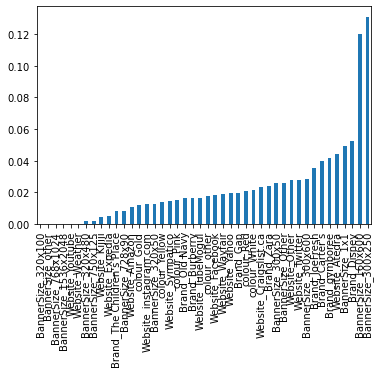

In [188]:
best_model.fit(X_res, y_res)

pd.Series(best_model.feature_importances_, index=X.columns).sort_values().plot(kind='bar');
